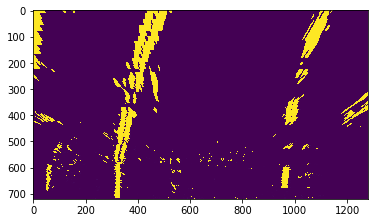

In [94]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as P
import cv2

# Load our image
binary_warped = mpimg.imread('warped_example.jpg')
plt.imshow(binary_warped)

(1280,)


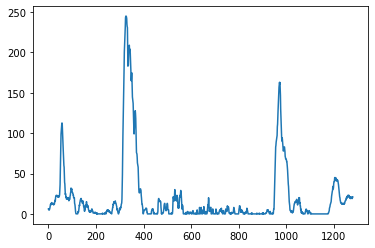

In [14]:
 
# Load our image
# `mpimg.imread` will load .jpg as 0-255, so normalize back to 0-1
img = mpimg.imread('warped_example.jpg')/255

def hist(img):
    # TO-DO: Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[img.shape[0]//2:,:]

    # TO-DO: Sum across image pixels vertically - make sure to set `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram

# Create histogram of image binary activations
histogram = hist(img)

# Visualize the resulting histogram
print(histogram.shape)
plt.plot(histogram)

In [ ]:
def ORIG_find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = 0  # Update this
        win_xleft_high = 0  # Update this
        win_xright_low = 0  # Update this
        win_xright_high = 0  # Update this
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        left_x_inds = np.wehre
        good_left_inds = None
        good_right_inds = None
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        pass # Remove this when you add your function

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def ORIG_fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = None
    right_fit = None

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img


out_img = fit_polynomial(binary_warped)

plt.imshow(out_img)

In [ ]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load our image - this should be a new frame since last time!
binary_warped = mpimg.imread('warped_example.jpg')

# Polynomial fit values from the previous frame
# Make sure to grab the actual values from the previous step in your project!
left_fit = np.array([ 2.13935315e-04, -3.77507980e-01,  4.76902175e+02])
right_fit = np.array([4.17622148e-04, -4.93848953e-01,  1.11806170e+03])

def ORIG_fit_poly(img_shape, leftx, lefty, rightx, righty):
    ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit = None
    right_fit = None
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = None
    right_fitx = None
    
    return left_fitx, right_fitx, ploty

def ORIG_search_around_poly(binary_warped):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = None
    right_lane_inds = None
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
    
    return result

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
result = search_around_poly(binary_warped)

# View your output
plt.imshow(result)

In [9]:
a = (np.array([640, 640, 640, 719, 719, 719]), np.array([240, 312, 315, 336, 339, 343]))
print(np.stack(a,axis=1))

[[640 240]
 [640 312]
 [640 315]
 [719 336]
 [719 339]
 [719 343]]


## `find_lane_pixels()`

In [126]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    plt.plot(histogram);plt.show()
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint    = np.int(histogram.shape[0]//2)
    leftx_base  = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    print(' left x base:', leftx_base, '  right x base ', rightx_base )
    
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero  = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    print( 'nonzero x: ', nonzerox.shape, nonzerox)
    print( 'nonzero y: ', nonzeroy.shape, nonzeroy)
  
    # Current positions to be updated later for each window in nwindows
    leftx_current  = leftx_base
    rightx_current = rightx_base
    print(' left x current:', leftx_current, '  right x current ', rightx_current )
    
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds  = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low  = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low   = leftx_current  - margin  # Update this
        win_xleft_high  = leftx_current  + margin  # Update this
        win_xright_low  = rightx_current - margin  # Update this     
        win_xright_high = rightx_current + margin  # Update this

        print()
        print(' Window: ', window)
        print(' y range: ', win_y_low,' to ', win_y_high , 'len:', win_y_high - win_y_low)
        print(' left x range: ', win_xleft_low,' to ', win_xleft_high , 'len:', win_xleft_high - win_xleft_low)
        print(' left x range: ', win_xright_low,' to ', win_xright_high , 'len:', win_xright_high - win_xright_low)
        print('-'*50)
        
        # Draw the windows on the visualization image
#         out_img = np.copy(img)
        print(' rec 1: (',win_xleft_low , win_y_low, ')  to  (', win_xleft_high  , win_y_high, ')')
        print(' rec 2: (',win_xright_low, win_y_low, ')  to  (', win_xright_high , win_y_high, ')')
        cv2.rectangle(out_img,(win_xleft_low,win_y_low), (win_xleft_high,win_y_high),(0,255,0), 3) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low), (win_xright_high,win_y_high),(0,255,0), 3) 
#         plt.imshow(out_img);plt.show()
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        
        ### Presented solution
        
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        ### My solution
        
        left_x_inds = np.where((win_xleft_low <=  nonzerox) & (nonzerox < win_xleft_high))
        left_y_inds = np.where((win_y_low <=  nonzeroy) & (nonzeroy < win_y_high))
        good_left_inds = np.intersect1d(left_x_inds,left_y_inds,assume_unique=False)
        
        right_x_inds = np.where((win_xright_low <= nonzerox) &  (nonzerox < win_xright_high))
        right_y_inds = np.where((win_y_low <=  nonzeroy) &  (nonzeroy < win_y_high))
        good_right_inds = np.intersect1d(right_x_inds,right_y_inds,assume_unique=False)

        print(' left_x_inds  : ', left_x_inds[0].shape, left_x_inds)
        print(' left_y_indx  : ', left_y_inds[0].shape, left_y_inds)
        print(' right_x_inds : ', right_x_inds[0].shape, right_x_inds)
        print(' right_y_indx : ', right_y_inds[0].shape, right_y_inds)
        print(' good left inds size: ', good_left_inds.shape[0])
#         print( nonzerox[good_left_inds]); print( nonzeroy[good_left_inds])
        
        print(' good right inds size: ', good_right_inds.shape[0])
#         print(nonzerox[good_right_inds]); print(nonzeroy[good_right_inds])
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if (good_left_inds.shape[0] > minpix):
            print(' Set leftx_current :', leftx_current, ' --->', int(nonzerox[good_left_inds].mean()))
            leftx_current = int(nonzerox[good_left_inds].mean())

        if (good_right_inds.shape[0] > minpix) :
            print(' Set rightx_current :', rightx_current, ' --->', int(nonzerox[good_right_inds].mean()))
            rightx_current = int(nonzerox[good_right_inds].mean())

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    print()
    print(' left lane inds type/len: ', type(left_lane_inds), len(left_lane_inds))
    try:
        left_lane_inds  = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)        
    except ValueError:
        # Avoids an error if the above is not implemented fully
        print(' concatenate not working ')
        pass
    
    
    print(' left lane inds type/len: ',type(left_lane_inds), len(left_lane_inds), left_lane_inds.shape)
    
    # Extract left and right line pixel positions
    leftx  = nonzerox[left_lane_inds]
    lefty  = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    print( leftx.shape, lefty.shape, rightx.shape, righty.shape)
    return leftx, lefty, rightx, righty, out_img


In [122]:
def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = np.polyfit( lefty, leftx, 2, full=False)
    right_fit = np.polyfit(righty, rightx, 2, full=False)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )

    print(' left fit : ', left_fit)
    print(' right fit: ', right_fit)
    print(' create ploty linspace(0,',binary_warped.shape[0]-1,',',binary_warped.shape[0],')')
    print(type(ploty), ploty.shape)
    
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img

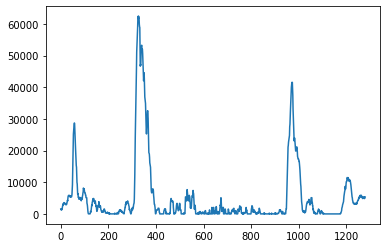

 left x base: 327   right x base  971
nonzero x:  (89486,) [   0    1    2 ... 1051 1067 1069]
nonzero y:  (89486,) [  0   0   0 ... 719 719 719]
 left x current: 327   right x current  971

 Window:  0
 y range:  640  to  720 len: 80
 left x range:  227  to  427 len: 200
 left x range:  871  to  1071 len: 200
--------------------------------------------------
 rec 1: ( 227 640 )  to  ( 427 720 )
 rec 2: ( 871 640 )  to  ( 1071 720 )
(array([ 1806,  2018,  2224, ..., 89382, 89383, 89384], dtype=int64),)
 left_x_inds  :  (28911,) (array([ 1806,  2018,  2224, ..., 89382, 89383, 89384], dtype=int64),)
 left_y_indx  :  (7376,) (array([82110, 82111, 82112, ..., 89483, 89484, 89485], dtype=int64),)
 right_x_inds :  (16122,) (array([ 3409,  3410,  3411, ..., 89483, 89484, 89485], dtype=int64),)
 right_y_indx :  (7376,) (array([82110, 82111, 82112, ..., 89483, 89484, 89485], dtype=int64),)
 good left inds size:  2414
 good right inds size:  1873
 Set leftx_current : 327  ---> 319
 Set rightx_c

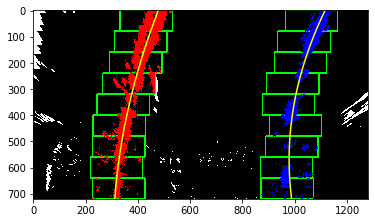

In [123]:
out_img = fit_polynomial(binary_warped)

plt.imshow(out_img)

## Finding the Lines - Search from Prior

In [132]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load our image - this should be a new frame since last time!
binary_warped = mpimg.imread('warped_example.jpg')

# Polynomial fit values from the previous frame
# Make sure to grab the actual values from the previous step in your project!
left_fit = np.array([ 2.13935315e-04, -3.77507980e-01,  4.76902175e+02])
right_fit = np.array([4.17622148e-04, -4.93848953e-01,  1.11806170e+03])

In [133]:
def fit_poly(img_shape, leftx, lefty, rightx, righty):
    ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit( lefty, leftx, 2, full=False)
    right_fit = np.polyfit(righty, rightx, 2, full=False)

    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]    
    return left_fitx, right_fitx, ploty

In [300]:
def search_around_poly(binary_warped):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    
    fitted_x_left     = (left_fit[0]*nonzeroy**2 + left_fit[1]*nonzeroy + left_fit[2])
    fitted_x_right    = (right_fit[0]*nonzeroy**2 + right_fit[1]*nonzeroy + right_fit[2])
    print( fitted_x_left.shape, fitted_x_right.shape)
    
    left_lane_inds  = ((nonzerox > fitted_x_left - margin ) & (nonzerox < fitted_x_left + margin )).nonzero()
    right_lane_inds = ((nonzerox > fitted_x_right - margin) & (nonzerox < fitted_x_right + margin)).nonzero()
    
    print("left_lane_inds : ",left_lane_inds[0].shape, left_lane_inds)
    print("right_lane_inds: ",right_lane_inds[0].shape, right_lane_inds)
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]  ## Red
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255] ## Blue

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin,ploty])))])
    left_line_pts     = np.hstack((left_line_window1, left_line_window2))
    left_lane         = np.array(np.transpose(np.vstack([left_fitx, ploty])),dtype=np.int32)

    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin,ploty])))])
    right_line_pts     = np.hstack((right_line_window1, right_line_window2))
    right_lane         = np.array([np.transpose(np.vstack([right_fitx, ploty]))], dtype=np.int32)
    print(right_line_window1.shape, right_line_pts.shape)
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
#     cv2.polylines(window_img, np.int_([right_line_pts]), True, (255,255, 0), thickness= 1)
#     cv2.drawContours(window_img, np.int_([right_line_pts]), -1, (0,255,0), thickness=cv2.FILLED)

    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
#     cv2.polylines(out_img, np.int_([left_lane]), False, (255,255,0), thickness=1, lineType = cv2.LINE_AA)
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
    
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)    
    return result

(89486,) (89486,)
left_lane_inds :  (41638,) (array([   77,    78,    79, ..., 89382, 89383, 89384], dtype=int64),)
right_lane_inds:  (21444,) (array([  170,   171,   172, ..., 89483, 89484, 89485], dtype=int64),)
(1, 720, 2) (1, 1440, 2)


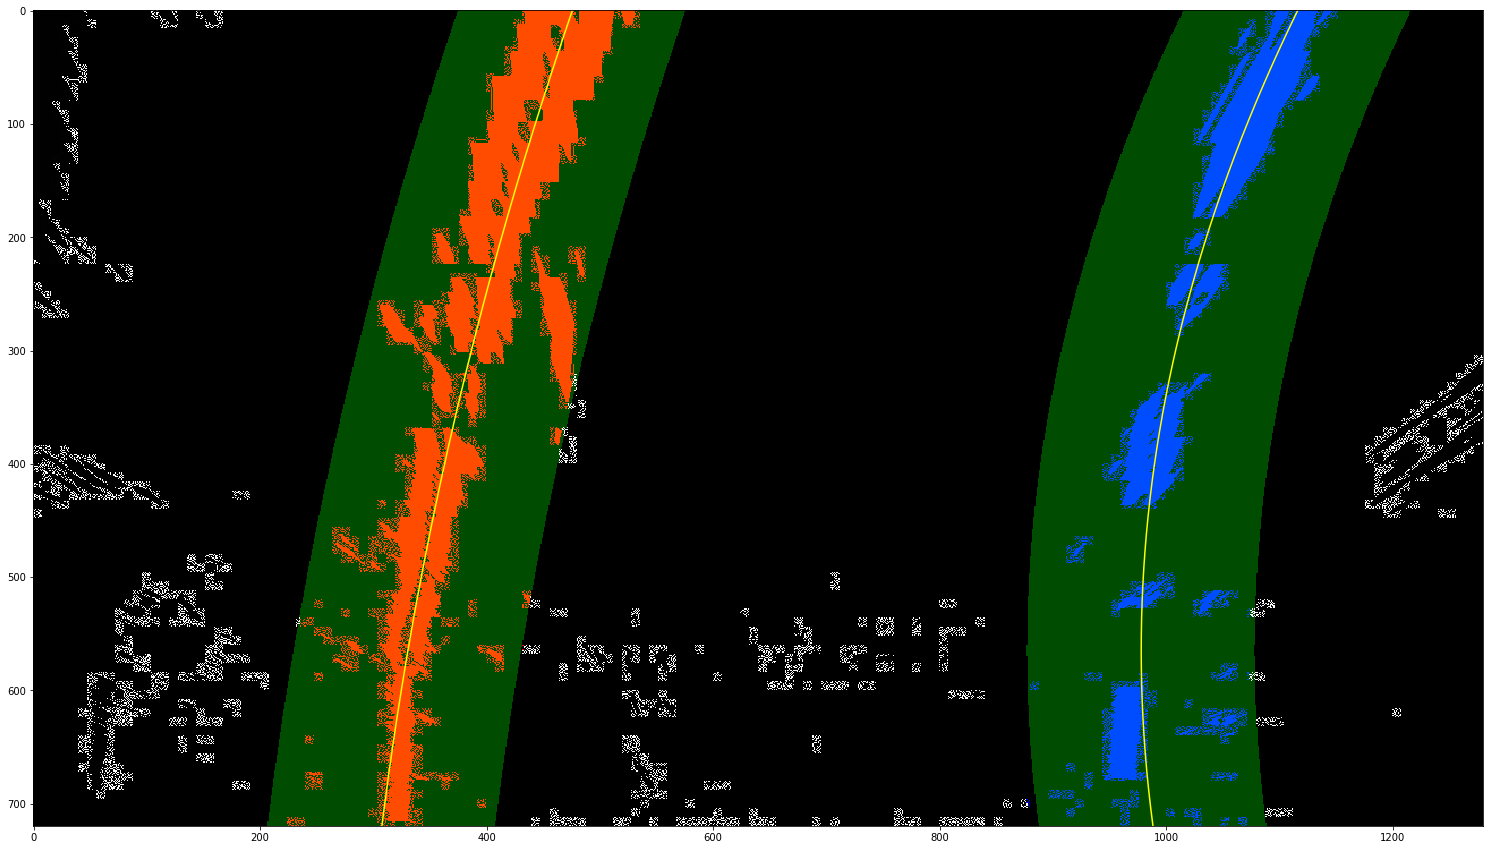

In [301]:
# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
plt.figure(figsize=(30,15))
result = search_around_poly(binary_warped)

# View your output

plt.imshow(result)

## Measuring Curvature - I

In [ ]:
import numpy as np

def generate_data():
    '''
    Generates fake data to use for calculating lane curvature.
    In your own project, you'll ignore this function and instead
    feed in the output of your lane detection algorithm to
    the lane curvature calculation.
    '''
    # Set random seed number so results are consistent for grader
    # Comment this out if you'd like to see results on different random data!
    np.random.seed(0)
    # Generate some fake data to represent lane-line pixels
    ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
    quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
    # For each y position generate random x position within +/-50 pix
    # of the line base position in each case (x=200 for left, and x=900 for right)
    leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty])
    rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty])

    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


    # Fit a second order polynomial to pixel positions in each fake lane line
    left_fit = np.polyfit(ploty, leftx, 2)
    right_fit = np.polyfit(ploty, rightx, 2)
    
    return ploty, left_fit, right_fit

In [ ]:
def radius_of_curvature(y_eval, fit_coeffs):
    A,B,_ = fit_coeffs    
    return  ((1 + ((2*A*y_eval)+B)**2)** 1.5)/np.absolute(2*A)

### If we fit curve using pixel scale points, and later we want to convert the 
### polynomial coefficients to metric scale, we can use this
def radius_of_curvature2(y_eval, fit_coeffs, mx, my):
    A,B,_ = fit_coeffs   
    A = (A * mx)/ (my**2)
    B = (B * mx/my)
    return  ((1 + ((2*A*y_eval)+B)**2)** 1.5)/np.absolute(2*A)

In [321]:
def measure_curvature_pixels():
    '''
    Calculates the curvature of polynomial functions in pixels.
    '''
    # Start by generating our fake example data
    # Make sure to feed in your real data instead in your project!
    ploty, left_fit, right_fit = generate_data()
    print(left_fit, right_fit)
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    ##### TO-DO: Implement the calculation of R_curve (radius of curvature) #####
    left_curverad = radius_of_curvature(y_eval, left_fit)  ## Implement the calculation of the left line here
    right_curverad = radius_of_curvature(y_eval, right_fit)  ## Implement the calculation of the right line here
    
    return left_curverad, right_curverad

In [322]:
# Calculate the radius of curvature in pixels for both lane lines
left_curverad, right_curverad = measure_curvature_pixels()

print(left_curverad, right_curverad)
# Should see values of 1625.06 and 1976.30 here, if using
# the default `generate_data` function with given seed number

[ 3.07683280e-04 -4.44713275e-01  3.59067572e+02] [ 2.53380891e-04 -3.96103079e-01  1.04908806e+03]
1625.0601831657184 1976.2967307714246


## Measuring Curvature - II

In [347]:
import numpy as np

def generate_data(ym_per_pix, xm_per_pix):
    '''
    Generates fake data to use for calculating lane curvature.
    In your own project, you'll ignore this function and instead
    feed in the output of your lane detection algorithm to
    the lane curvature calculation.
    '''
    # Set random seed number so results are consistent for grader
    # Comment this out if you'd like to see results on different random data!
    np.random.seed(0)
    
    # Generate some fake data to represent lane-line pixels
    ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
    
    quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
    
    # For each y position generate random x position within +/-50 pix
    # of the line base position in each case (x=200 for left, and x=900 for right)
    leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty])
    rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty])

    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

    # Fit a second order polynomial to pixel positions in each fake lane line
    ##### TO-DO: Fit new polynomials to x,y in world space #####
    ##### Utilize `ym_per_pix` & `xm_per_pix` here #####
    
#   First solution, convert all points to metric, then fit curve
#     left_fit_cr = np.polyfit(ploty * ym_per_pix, leftx * xm_per_pix, 2)
#     right_fit_cr = np.polyfit(ploty * ym_per_pix, rightx * xm_per_pix, 2)

#   Second solution, fit curve to pixel points, 
#   then convert(scale) the polynomial to metric coordinates
    left_fit_cr = np.polyfit(ploty , leftx , 2)
    right_fit_cr = np.polyfit(ploty, rightx , 2)
    

    return ploty, left_fit_cr, right_fit_cr

In [348]:

def convert_coeffs_to_metric(fit_coeffs, xm_per_pixel, ym_per_pixel):
    fit_coeffs[0] = (fit_coeffs[0] * xm_per_pixel) / (ym_per_pixel ** 2)
    fit_coeffs[1] = (fit_coeffs[1] * xm_per_pixel) / ym_per_pixel
    return fit_coeffs
    
def measure_curvature_real():
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    # Start by generating our fake example data
    # Make sure to feed in your real data instead in your project!
    ploty, left_fit_cr, right_fit_cr = generate_data(ym_per_pix, xm_per_pix)
    
    print('left fit (pixel scale)    : ', left_fit_cr)
    convert_coeffs_to_metric(left_fit_cr, xm_per_pix, ym_per_pix)
    print('after conversion to metric: ', left_fit_cr)

    print('right fit (pixel scale)   : ', right_fit_cr)
    convert_coeffs_to_metric(right_fit_cr, xm_per_pix, ym_per_pix)
    print('after conversion to metric: ', right_fit_cr)
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty) 
    y_eval_meters = y_eval *ym_per_pix
    ##### TO-DO: Implement the calculation of R_curve (radius of curvature) #####
    left_curverad = radius_of_curvature(y_eval_meters ,left_fit_cr) 
    right_curverad =  radius_of_curvature(y_eval_meters,right_fit_cr) 
    
    return left_curverad, right_curverad


# Calculate the radius of curvature in meters for both lane lines
left_curverad, right_curverad = measure_curvature_real()

print(left_curverad, 'm', right_curverad, 'm')
# Should see values of 533.75 and 648.16 here, if using
# the default `generate_data` function with given seed number

left fit (pixel scale)    :  [ 3.07683280e-04 -4.44713275e-01  3.59067572e+02]
after conversion to metric:  [ 9.36763722e-04 -5.64150555e-02  3.59067572e+02]
right fit (pixel scale)   :  [ 2.53380891e-04 -3.96103079e-01  1.04908806e+03]
after conversion to metric:  [ 7.71436220e-04 -5.02485049e-02  1.04908806e+03]
533.7525889210929 m 648.1574851434267 m
